In [10]:
import pandas as pd
import json
import glob
import re
from pathlib import Path

def extract_analysis_data(analysis_str):
    match = re.search(r"```json\s*(\{.*?\})\s*```", analysis_str, re.DOTALL)
    if not match:
        match = re.search(r"\{[^{}]*\"CLASSIFICATION\"[^{}]*\}", analysis_str, re.DOTALL)
    if match:
        try:
            return json.loads(match.group(1 if '```' in match.group(0) else 0))
        except json.JSONDecodeError:
            return None
    return None

# Contagem de alucinações por modelo
hallucination_count = {}

for test in range(12):
    files = glob.glob(f'{test}/inference/qwen3_14b/**/*.jsonl', recursive=True)
    print(f"Test {test}: Encontrados {len(files)} arquivos JSONL.")
    
    for file_path in files:
        path = Path(file_path)
        model = path.parts[2]

        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    record = json.loads(line)
                    analysis_data = extract_analysis_data(record.get('analysis', ''))

                    # Considera alucinação quando não houver campo CLASSIFICATION
                    if not (analysis_data and "CLASSIFICATION" in analysis_data):
                        hallucination_count[model] = hallucination_count.get(model, 0) + 1

                except Exception as e:
                    print(f"Erro ao processar linha do arquivo {file_path}: {str(e)}")

print("\n--- Contagem de Alucinações por Modelo ---")
for model, count in hallucination_count.items():
    print(f"{model}: {count}")

# Salvar em CSV
df_hallucinations = pd.DataFrame(list(hallucination_count.items()), columns=["model", "hallucination_count"])
display(df_hallucinations)


Test 0: Encontrados 300 arquivos JSONL.
Test 1: Encontrados 300 arquivos JSONL.
Test 2: Encontrados 300 arquivos JSONL.
Test 3: Encontrados 300 arquivos JSONL.
Test 4: Encontrados 300 arquivos JSONL.
Test 5: Encontrados 300 arquivos JSONL.
Test 6: Encontrados 300 arquivos JSONL.
Test 7: Encontrados 300 arquivos JSONL.
Test 8: Encontrados 300 arquivos JSONL.
Test 9: Encontrados 300 arquivos JSONL.
Test 10: Encontrados 300 arquivos JSONL.
Test 11: Encontrados 300 arquivos JSONL.

--- Contagem de Alucinações por Modelo ---
qwen3_14b: 175


,model,hallucination_count
0,qwen3_14b,175


In [11]:
import pandas as pd
import json
import glob
import re
from pathlib import Path

def extract_analysis_data(analysis_str):
    match = re.search(r"```json\s*(\{.*?\})\s*```", analysis_str, re.DOTALL)
    if not match:
        match = re.search(r"\{[^{}]*\"CLASSIFICATION\"[^{}]*\}", analysis_str, re.DOTALL)
    if match:
        try:
            return json.loads(match.group(1 if '```' in match.group(0) else 0))
        except json.JSONDecodeError:
            return None
    return None

# Contagem de alucinações por modelo
hallucination_count = {}

for test in range(12):
    files = glob.glob(f'{test}/inference/qwen3_14b_think/**/*.jsonl', recursive=True)
    print(f"Test {test}: Encontrados {len(files)} arquivos JSONL.")
    
    for file_path in files:
        path = Path(file_path)
        model = path.parts[2]

        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    record = json.loads(line)
                    analysis_data = extract_analysis_data(record.get('analysis', ''))

                    # Considera alucinação quando não houver campo CLASSIFICATION
                    if not (analysis_data and "CLASSIFICATION" in analysis_data):
                        hallucination_count[model] = hallucination_count.get(model, 0) + 1

                except Exception as e:
                    print(f"Erro ao processar linha do arquivo {file_path}: {str(e)}")

print("\n--- Contagem de Alucinações por Modelo ---")
for model, count in hallucination_count.items():
    print(f"{model}: {count}")

# Salvar em CSV
df_hallucinations = pd.DataFrame(list(hallucination_count.items()), columns=["model", "hallucination_count"])
display(df_hallucinations)


Test 0: Encontrados 299 arquivos JSONL.
Test 1: Encontrados 300 arquivos JSONL.
Test 2: Encontrados 300 arquivos JSONL.
Test 3: Encontrados 300 arquivos JSONL.
Test 4: Encontrados 300 arquivos JSONL.
Test 5: Encontrados 300 arquivos JSONL.
Test 6: Encontrados 300 arquivos JSONL.
Test 7: Encontrados 300 arquivos JSONL.
Test 8: Encontrados 300 arquivos JSONL.
Test 9: Encontrados 300 arquivos JSONL.
Test 10: Encontrados 300 arquivos JSONL.
Test 11: Encontrados 300 arquivos JSONL.

--- Contagem de Alucinações por Modelo ---
qwen3_14b_think: 246


,model,hallucination_count
0,qwen3_14b_think,246


In [16]:
import pandas as pd

df = pd.read_csv('results/result_table_brute.csv', sep=';', decimal=',')

df = df[df['vote'] == 'original']
df = df[df['model_1'].isin(['deepseek-r1_14b_no_think', 'deepseek-r1_14b_think'])]

test = df.groupby(['model_1']).sum()
display(test)

,vote,model_2,model_3,font,false_positive,false_negative,true_positive,true_negative,comb
model_1,,,,,,,,,
deepseek-r1_14b_no_think,originaloriginaloriginaloriginaloriginal,0,0,rawgemma3_4bllama3.2_3bphi4-minitinyllama_1.1b,488,52,2408,652,original-deepseek-r1_14b_no_thinkoriginal-deep...
deepseek-r1_14b_think,originaloriginaloriginaloriginaloriginal,0,0,rawgemma3_4bllama3.2_3bphi4-minitinyllama_1.1b,397,190,2270,743,original-deepseek-r1_14b_thinkoriginal-deepsee...


In [18]:
import pandas as pd

df = pd.read_csv('results/result_table_brute.csv', sep=';', decimal=',')

df = df[df['vote'] == 'original']
df = df[df['model_1'].isin(['qwen3_14b_no_think', 'qwen3_14b_think'])]

test = df.groupby(['model_1']).sum()
display(test)

,vote,model_2,model_3,font,false_positive,false_negative,true_positive,true_negative,comb
model_1,,,,,,,,,
qwen3_14b_no_think,originaloriginaloriginaloriginaloriginal,0,0,rawgemma3_4bllama3.2_3bphi4-minitinyllama_1.1b,276,349,2111,864,original-qwen3_14b_no_thinkoriginal-qwen3_14b_...
qwen3_14b_think,originaloriginaloriginaloriginaloriginal,0,0,rawgemma3_4bllama3.2_3bphi4-minitinyllama_1.1b,555,263,2196,585,original-qwen3_14b_thinkoriginal-qwen3_14b_thi...


C:\Users\lucas\AppData\Local\Temp\ipykernel_5204\3800364269.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\lucas\AppData\Local\Temp\ipykernel_5204\3800364269.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([comb_to_label[c] for c in order])
C:\Users\lucas\AppData\Local\Temp\ipykernel_5204\3800364269.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\lucas\AppData\Local\Temp\ipykernel_5204\3800364269.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([co

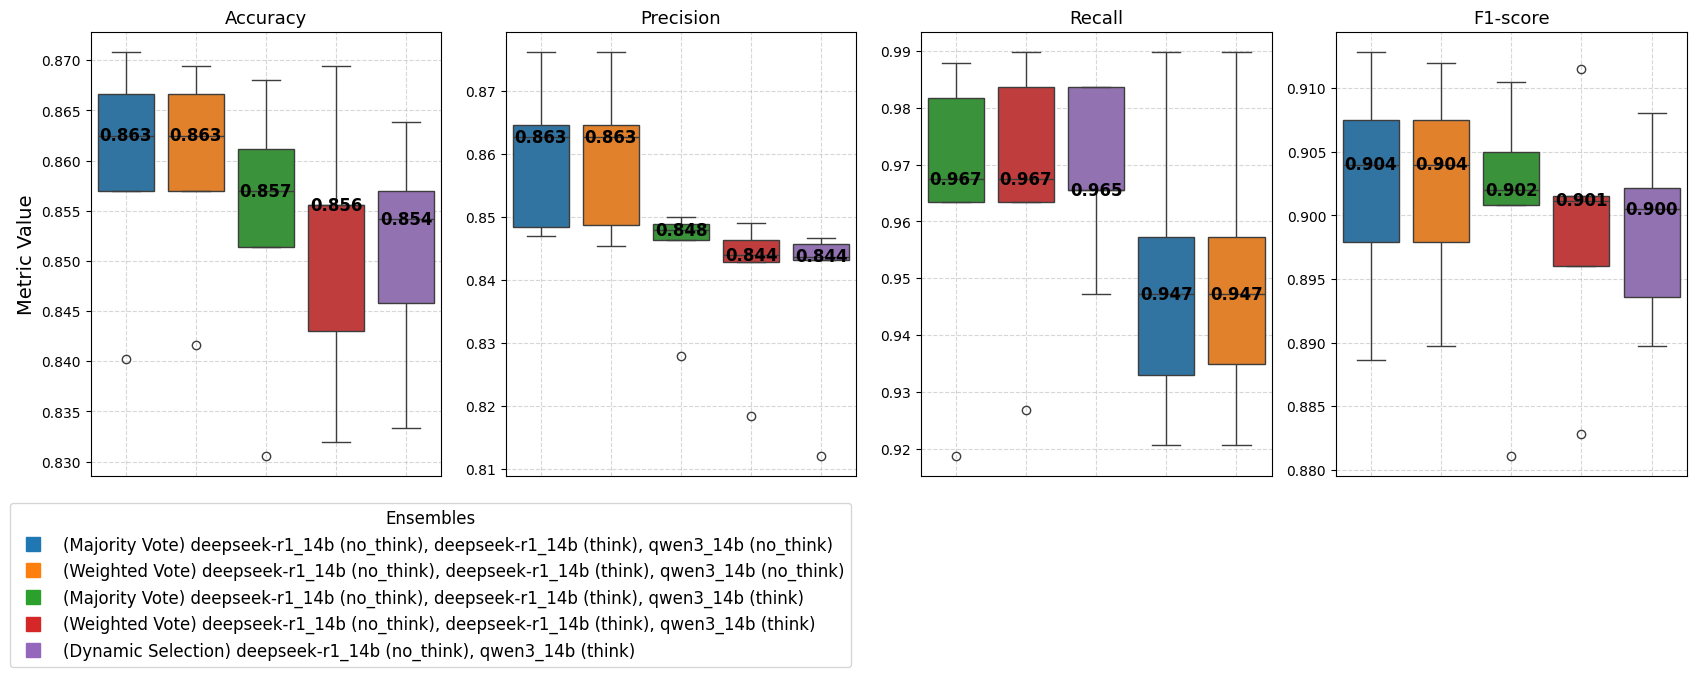

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("results/result_table.csv", sep=';', decimal=',')
df = df[~df['vote'].isin(['original'])]

metric_translation = {
    "accuracy": "Accuracy",
    "precision": "Precision",
    "recall": "Recall",
    "f1_score": "F1-score"
}
metrics = list(metric_translation.keys())

vote_translation = {
    "dynamic_selection": "Dynamic Selection",
    "weighted_vote": "Weighted Vote",
    "majority_vote": "Majority Vote",
    "original": "Individual Model"
}

df["vote"] = df["vote"].replace(vote_translation)

# Combinação para seleção
df['comb'] = df[['vote', 'model_1', 'model_2', 'model_3']].apply(
    lambda row: '-'.join(row.dropna().astype(str)), axis=1
)

# Novo rótulo para exibição no eixo X
df['label'] = df.apply(
    lambda row: f"({row['vote']}) " + ", ".join(
        [str(v) for v in [row['model_1'], row['model_2'], row['model_3']] if pd.notna(v)]
    ),
    axis=1
)

# Derrete
df_melt = df.melt(
    id_vars=["comb", "label"],
    value_vars=metrics,
    var_name="Metric",
    value_name="Value"
)

# ---------- SELEÇÃO DOS MELHORES PELO F1-SCORE ----------
top_n = 5
f1_medianas = (
    df_melt[df_melt["Metric"] == "f1_score"]
    .groupby("comb")["Value"]
    .median()
    .sort_values(ascending=False)
)
melhores = f1_medianas.head(top_n).index.tolist()

df_melt_best = df_melt[df_melt["comb"].isin(melhores)]
# -------------------------------------------

# Mapear comb -> label
comb_to_label = df.set_index("comb")["label"].to_dict()

# paleta consistente
palette = dict(zip(melhores, sns.color_palette("tab10", len(melhores))))

# plot
n = len(metrics)
fig, axes = plt.subplots(1, n, figsize=(5 * n, 5), squeeze=False)
axes = axes[0]

for ax, m in zip(axes, metrics):
    data = df_melt_best[df_melt_best["Metric"] == m]

    # ordena do maior para o menor
    order = (
        data.groupby("comb")["Value"]
        .median()
        .sort_values(ascending=False)
        .index
        .tolist()
    )

    sns.boxplot(
        x="comb", y="Value",
        data=data, order=order,
        palette={f: palette[f] for f in order},
        ax=ax,
    )

    # Substitui os ticks pelo label formatado
    ax.set_xticklabels([comb_to_label[c] for c in order])
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

    # adiciona valores medianos
    for i, comb in enumerate(order):
        subset = data[data["comb"] == comb]["Value"]
        median = subset.median()
        ax.text(i, median, f"{median:.3f}", ha='center', va='center',
                fontsize=12, fontweight="bold", color="black")

    # usa tradução aqui
    ax.set_title(metric_translation[m], fontsize=13)
    ax.set_xlabel("")
    ax.set_ylabel("Metric Value" if m == metrics[0] else "", fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)

# ---------- LEGENDA ÚNICA ----------
handles = [
    plt.Line2D([0], [0], marker='s', color=palette[c],
               linestyle='', markersize=10) for c in melhores
]
labels = [comb_to_label[c] for c in melhores]

fig.legend(handles, labels, title="Ensembles",
           bbox_to_anchor=(0, 0), loc="upper left", fontsize=12, title_fontsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
